In [16]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer,TreebankWordTokenizer
from nltk.tokenize import PunktTokenizer,PunktSentenceTokenizer,WordPunctTokenizer
import matplotlib.pyplot as plt
from nltk import FreqDist



### Tokenization

**Tokenization** is the process of breaking down a text or sentence into smaller units called *tokens*. Tokens can be words, subwords, or even characters, depending on the level of granularity required. This is often the first step in Natural Language Processing (NLP) tasks as it transforms raw text into a structured format suitable for analysis or modeling.

#### Example:
For the sentence:
> *"Natural Language Processing is fascinating!"*

- **Word-level tokens:** `["Natural", "Language", "Processing", "is", "fascinating", "!"]`
- **Character-level tokens:** `["N", "a", "t", "u", "r", "a", "l", " ", "L", "a", "n", "g", ...]`

#### Why Tokenization is Important:
1. **Prepares text for analysis:** It converts unstructured text into a structured format.
2. **Key to NLP models:** Most models require input as tokens (e.g., words, subwords).
3. **Enables flexibility:** Different tokenization techniques are suited to various tasks, such as sentiment analysis, machine translation, or question answering.


| **Tokenizer**                | **Description**                                                                                                    | **When to Use**                                                                                       | **Why to Use**                                                                                           | **Key Features**                                                                                                                                                       | **Limitations**                                                                                                     |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| **`word_tokenize`**          | Tokenizes text into words using the Penn Treebank tokenizer.                                                       | For general-purpose word tokenization on standard English text.                                        | Handles common contractions and punctuation effectively.                                                  | - Breaks text into words and punctuation. <br> - Includes contractions like "don't" as a single token.                                                   | May over-tokenize non-standard text or fail with non-English languages.                                             |
| **`sent_tokenize`**          | Splits text into sentences using the Punkt Sentence Tokenizer.                                                     | When you need to segment a paragraph or document into sentences.                                       | Works well on large, unstructured text where sentence boundaries are not explicitly marked.               | - Pre-trained on English but can be trained on other languages. <br> - Handles abbreviations like "Mr." correctly.                                         | Might misidentify sentence boundaries in complex or unusual text.                                                   |
| **`RegexpTokenizer`**        | Tokenizes text based on custom regular expressions.                                                                | When you need custom tokenization rules, e.g., extracting numbers, hashtags, or specific patterns.    | Allows flexibility in defining patterns for specific use cases.                                           | - Fully customizable using regex. <br> - Can ignore unwanted tokens or focus on specific patterns like hashtags (`#example`).                             | Requires knowledge of regular expressions. <br> Not ideal for general-purpose use.                                 |
| **`TreebankWordTokenizer`**  | A rule-based tokenizer similar to `word_tokenize` but slightly stricter.                                           | For structured or standardized English text where finer control over tokenization is required.         | Handles contractions and punctuation very precisely, adhering to Penn Treebank standards.                | - Treats possessive endings (`'s`) as separate tokens. <br> - Splits punctuation like `.,!?` into separate tokens.                                         | May over-split compared to `word_tokenize`.                                                                         |
| **`TweetTokenizer`**         | Specially designed to tokenize social media text, including tweets and hashtags.                                   | When working with informal text, e.g., tweets, social media posts, or text with emojis.               | Handles hashtags, mentions, and emoticons effectively.                                                    | - Retains emojis, hashtags, and URLs. <br> - Can be configured to ignore or keep case sensitivity.                                                       | Limited to social media text. <br> Not ideal for structured or formal documents.                                    |
| **`PunktSentenceTokenizer`** | A pre-trained unsupervised tokenizer for sentence boundary detection.                                               | For advanced sentence tokenization with text in different languages or domains.                       | Adapts to different writing styles and languages.                                                          | - Can be trained on custom data for better results. <br> - Handles abbreviations, ellipses, and quotes effectively.                                       | Training may be required for non-English or domain-specific text.                                                   |
| **`WhitespaceTokenizer`**    | Splits text based on spaces.                                                                                        | For very simple and fast tokenization when whitespace separation is sufficient.                        | Minimal overhead and computationally efficient.                                                           | - Splits tokens strictly by spaces. <br> - Fastest tokenizer in NLTK.                                                                                   | Does not handle punctuation, contractions, or special tokens.                                                       |
| **`WordPunctTokenizer`**     | Splits text into words and punctuation separately.                                                                  | When you need to treat punctuation as separate tokens explicitly.                                      | Useful for linguistic analysis that requires separating punctuation from words.                            | - Separates words and punctuation effectively. <br> - Retains special characters like `@` and `#` in tokens.                                             | Over-splits tokens in most practical scenarios.                                                                     |
| **`MWETokenizer`**           | Multi-word expression tokenizer to tokenize phrases or idioms as single tokens.                                    | When working with text that contains phrases or multi-word expressions that should be treated as one. | Preserves meaningful multi-word expressions (e.g., "New York", "credit card") as single tokens.           | - Can be customized with multi-word expressions. <br> - Avoids splitting meaningful phrases.                                                            | Requires predefining the list of multi-word expressions.                                                            |


In [4]:
corpus = [
    "Hello, how are you doing today?",
    "NLTK is a powerful library for natural language processing.",
    "I'm learning tokenization—it's fun and exciting!",
    "The price of the laptop is $999.99, isn't it?",
    "He said, 'Python is amazing!' and I couldn't agree more.",
    "The meeting is scheduled for 10:30 A.M. on Monday, November 20th, 2024.",
    "Let's test tokenization on a variety of texts, like emails (example@mail.com) or URLs (https://www.example.com).",
    "The quick brown fox jumps over the lazy dog.",
    "1234567890 - Numbers can be tokens too!",
    "Don't forget to test special characters: @, #, $, %, &, *, etc."
]

corpus = ' '.join(corpus)
corpus

"Hello, how are you doing today? NLTK is a powerful library for natural language processing. I'm learning tokenization—it's fun and exciting! The price of the laptop is $999.99, isn't it? He said, 'Python is amazing!' and I couldn't agree more. The meeting is scheduled for 10:30 A.M. on Monday, November 20th, 2024. Let's test tokenization on a variety of texts, like emails (example@mail.com) or URLs (https://www.example.com). The quick brown fox jumps over the lazy dog. 1234567890 - Numbers can be tokens too! Don't forget to test special characters: @, #, $, %, &, *, etc."

### Sentence Tokenization
- Sentence tokenization divides a text into sentences. This is especially useful for text summarization and paragraph-based analysis.

In [6]:
# sent Tokenization: For breaking corpus(paragraph) into individual Documents(sentences).

doc = sent_tokenize(corpus)
doc

['Hello, how are you doing today?',
 'NLTK is a powerful library for natural language processing.',
 "I'm learning tokenization—it's fun and exciting!",
 "The price of the laptop is $999.99, isn't it?",
 "He said, 'Python is amazing!'",
 "and I couldn't agree more.",
 'The meeting is scheduled for 10:30 A.M. on Monday, November 20th, 2024.',
 "Let's test tokenization on a variety of texts, like emails (example@mail.com) or URLs (https://www.example.com).",
 'The quick brown fox jumps over the lazy dog.',
 '1234567890 - Numbers can be tokens too!',
 "Don't forget to test special characters: @, #, $, %, &, *, etc."]

### Word Tokenization
- Word tokenization splits text into individual words. In many cases, this is the first step for most NLP tasks.

In [7]:
# word Tokenization: For breaking Document(sentences) into individual words.

for sentence in doc:
    print(word_tokenize(sentence))

['Hello', ',', 'how', 'are', 'you', 'doing', 'today', '?']
['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'natural', 'language', 'processing', '.']
['I', "'m", 'learning', 'tokenization—it', "'s", 'fun', 'and', 'exciting', '!']
['The', 'price', 'of', 'the', 'laptop', 'is', '$', '999.99', ',', 'is', "n't", 'it', '?']
['He', 'said', ',', "'Python", 'is', 'amazing', '!', "'"]
['and', 'I', 'could', "n't", 'agree', 'more', '.']
['The', 'meeting', 'is', 'scheduled', 'for', '10:30', 'A.M.', 'on', 'Monday', ',', 'November', '20th', ',', '2024', '.']
['Let', "'s", 'test', 'tokenization', 'on', 'a', 'variety', 'of', 'texts', ',', 'like', 'emails', '(', 'example', '@', 'mail.com', ')', 'or', 'URLs', '(', 'https', ':', '//www.example.com', ')', '.']
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
['1234567890', '-', 'Numbers', 'can', 'be', 'tokens', 'too', '!']
['Do', "n't", 'forget', 'to', 'test', 'special', 'characters', ':', '@', ',', '#', ',', '$', ',', '%', ','

In [14]:
#Breaking the corpus into words
word_tokenized = word_tokenize(corpus)
word_tokenized[:4]

['Hello', ',', 'how', 'are']

### Regex Tokenization
- can use regular expressions to create custom tokenizers.
- This can be useful when you want to capture specific patterns like emails or hashtags.

In [12]:

tokenizer = RegexpTokenizer(r'\w+')
text = "NLP is great, isn't it?"
print(tokenizer.tokenize(text))

['NLP', 'is', 'great', 'isn', 't', 'it']


### Treebank Tokenizer
- Treebank tokenization is a more advanced tokenizer that splits words using rules and is often used in linguistic parsing.

In [13]:
tokenizer = TreebankWordTokenizer()
text = "They're running late."
print(tokenizer.tokenize(text))

['They', "'re", 'running', 'late', '.']


### Applications of Tokenization
- Tokenization is essential for many NLP tasks:

**Sentiment Analysis**: Analyzing the sentiment of a text by processing tokenized words.

**Machine Translation**: Translating text from one language to another.

**Text Summarization**: Condensing a document by tokenizing and then analyzing the content.

**Language Modeling**: Building models that predict the next word or sentence in a sequence.

## Token Viz

- Token frequency visualization can help you understand the distribution of words in a text. You can plot token frequencies using matplotlib

<Axes: title={'center': 'Token Frequency'}, xlabel='Samples', ylabel='Counts'>

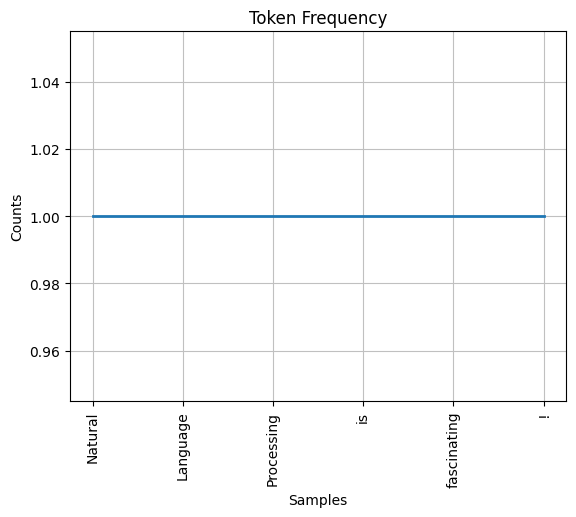

In [17]:
tokens = word_tokenize("Natural Language Processing is fascinating!")
freq_dist = FreqDist(tokens)
freq_dist.plot(10, title="Token Frequency")